# 1.Nagler's Example

Population size: 1
Infected at t=0: 0.05
R0= 3.33
R_eff=1 at t= 11 d
'Susceptible' reach bottom on day: 189
'Susceptible' bottom number is: 3.85%
'infected' reach peak on day: 11
'infected' peak is: 35.4%
'Recovered' reach peak on day: 189
'Recovered' peak is: 96.15%


<Figure size 432x288 with 0 Axes>

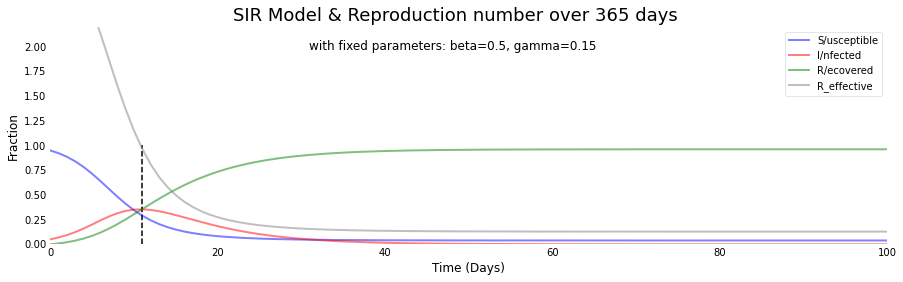

In [135]:
# Basic SIR model (adapted) Jan Nagler (speak Sir Jan Nagler), v2
import numpy as np
import pandas as pd
import math
from scipy.integrate import odeint
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

######## Set Parameters
N = 1 # Population size
I0, R0 = 0.05, 0  #Initial conditions at t=0
S0 = N - I0 - R0 #Normalization

β = 0.5
Ɣ = 0.15

R_nought = β / Ɣ 

t = np.linspace(0, 365, 365)# Set time range: 365 days;  Time scale/step: 1 day

######## Original SIR model: 
def deriv_sir(y, t, N, β, Ɣ):
    S, I, R = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I
    dRdt = Ɣ * I
    return dSdt, dIdt, dRdt


y0 = S0, I0, R0# Initial conditions vector

ret = odeint(deriv_sir, y0, t, args=(N, β, Ɣ))# Integration of SIRD model
S, I, R = ret.T #Return 4 vectors

######## Get the date when S,I,D start remaining constant, and S,I,D numbers
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date = get_stable_1(t, S, I, R)

######## Find the time when R_effective = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1: 
        t_1 = time
        break


######## Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",round(R_nought,2))
print("R_eff=1 at t=", t_1, "d")
print(f"'Susceptible' reach bottom on day: {S_bottom_date}")
print(f"'Susceptible' bottom number is: {S_bottom}%")
print(f"'infected' reach peak on day: {I_peak_date}")
print(f"'infected' peak is: {I_peak}%")
print(f"'Recovered' reach peak on day: {R_peak_date}")
print(f"'Recovered' peak is: {R_peak}%")


######## Plot the data: 
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label='R_effective')

plt.figtext(.5,.9,f"SIR Model & Reproduction number over {int(t[-1])} days", fontsize=18, ha='center')
plt.figtext(.5,.8,f"with fixed parameters: beta={β}, gamma={Ɣ} ", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2.2)
ax.set_xlim(0,100)

ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

# Utility Functions

In [92]:
######## Get the date when S,I,D start remaining constant, and S,I,D numbers
def get_stable_1(t, S, I, R):
    S_bottom = round(min(S)*100, 2)
    I_peak = round(max(I)*100, 2)
    R_peak = round(max(R)*100, 2)

    i = 0
    while S[i] > min(S):
            i += 1
    S_bottom_date = int(t[i])

    i = 0
    while I[i] < max(I):
            i += 1
    I_peak_date = int(t[i])

    i = 0
    while R[i] < max(R):
            i += 1
    R_peak_date = int(t[i])

    return S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date



def get_stable_2(t, S, I, R, D):
    S_bottom = round(min(S)*100, 2)
    I_peak = round(max(I)*100, 2)
    R_peak = round(max(R)*100, 2)
    D_peak = round(max(D)*100, 2)

    i = 0
    while S[i] > min(S):
            i += 1
    S_bottom_date = int(t[i])

    i = 0
    while I[i] < max(I):
            i += 1
    I_peak_date = int(t[i])

    i = 0
    while R[i] < max(R):
            i += 1
    R_peak_date = int(t[i])

    i = 0
    while D[i] < max(D):
            i += 1
    D_peak_date = int(t[i])


    return S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date

S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable(t, S, I, R, D)
print(S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date)


0.66 257 48.84 11 99.34 257 22.57 206


# 2.Question-1 (a)

The SIR model is a 3-compartment model.  Extend this model to 4 com-partments,  where  the  4th  compartment  is  for  deaths  (D).  Mortality  ismodelled by new transitions fromI→Ddefined by the mortality rateμ.Susceptible and Recovered do not die.(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

(a) Derive the corresponding system of equations for S, I, R and D. E.g.,dDdt=μIbut this is not the only difference to SIR. In addition, the basicreproduction number may now depend onμas well, how?

extended SIRD model:
![pic-1] (pic-1.png)

**Updated list of variables in the model**

N: total population set to 1

S(t): percentage of people susceptible on day t

I(t): percentage of people infected on day t

R(t): percentage of people recovered on day t

D(t): percentage of people dead on day t

\---------------------------------------------- 

R<sub>0</sub>: Basic reproduction number

R<sub>e</sub>: Basic reproduction number

β: expected percentage of people newly infected per day

γ: the percentage of infected people recovering per day 

μ: mortality rate

\---------------------------------------------- 

**ODE System**

$\frac{dS}{dt}= -β·I·\frac{S}{N}$

$\frac{dI}{dt}= β·I·\frac{S}{N} - γ·I -μ·I$

$\frac{dR}{dt} =γ·I$

$\frac{dD}{dt} =μ·I$

\---------------------------------------------- 

**TAKEAWAY**

$R^{SIRD}_{0}=\frac{β}{γ+μ}$

R_nought is previously measured as β/Ɣ, the number of infected people over the number of recovered people, which gives a base-line infectiousness of COVID as its the fundamental property. At time 0, R_nought is directly proportional to β and inversely preportional to Ɣ. Therefore, R_nought is dependent on β and Ɣ. 

Taking Death rate into consideration, represented by the death rate μ, we add one more scenario after infection. Therefore, among β infected people, Ɣ people will recover and μ people will die in a time unit, two independent scenarios after infection. All three parameters are fundamental properties of COVID. To reflect this added scenario, we need to add μ to Ɣ. Now at time 0, R_nought is still directly proportional to β, but inversely preportional to the sum of Ɣ and μ. Therefore, R_nought now is dependent on β, Ɣ and μ. 

$R^{SIRD}_{eff}=R_{0}*\frac{S_{t}}{N}$

The effective reproduction number Reff at day t is calulated by Reff(t)= R_nought * S(t) / N

Population size: 1
Infected at t=0: 0.05
R0= 2.5
R_eff=1 at t= 11 d
'Susceptible' reach bottom on day: 166
'Susceptible' bottom number is: 10.02%
'infected' reach peak on day: 11
'infected' peak is: 25.35%
'infected' reach peak on day: 166
'infected' peak is: 67.49%
'Death' reach peak on day: 166
'Death' peak is: 22.5%


<Figure size 432x288 with 0 Axes>

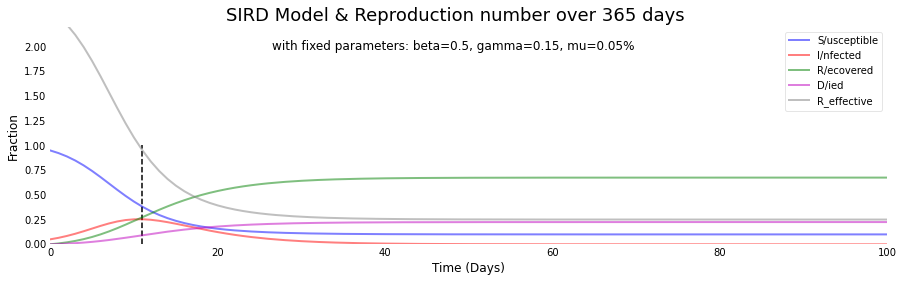


 TAKEAWAY: From the graph above, we can see............................


In [136]:
######## Set Parameters
N = 1 # Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

β = 0.5 # = 1 /2.5 days 0.39, 0.15
Ɣ = 0.15 # = 1 /10 days
μ = 0.05 # = 1 /33 days

R_nought = β / (Ɣ + μ) 

t = np.linspace(0, 365, 365)# Set time range: 365 days;  Time scale/step: 1 day

######## SIRD model:
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

y0 = S0, I0, R0, D0# Initial conditions vector

ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))# Integration of SIRD model
S, I, R, D = ret.T #Return 4 vectors

######## Get the date when S,I,D start remaining constant, and S,I,D numbers
S_bottom, S_bottom_date, I_peak, I_peak_date, R_peak, R_peak_date, D_peak, D_peak_date = get_stable_2(t, S, I, R, D)

######## Find the time when R_effective = 1
t_1 = 0
for time in range(0,len(S)):
    if R_nought*S[time] < 1:  
        t_1 = time
        break

######## Print Info.:
print("Population size:", N)
print("Infected at t=0:", I0)
print ("R0=",round(R_nought,2))
print("R_eff=1 at t=", t_1, "d")
print(f"'Susceptible' reach bottom on day: {S_bottom_date}")
print(f"'Susceptible' bottom number is: {S_bottom}%")
print(f"'infected' reach peak on day: {I_peak_date}")
print(f"'infected' peak is: {I_peak}%")
print(f"'infected' reach peak on day: {R_peak_date}")
print(f"'infected' peak is: {R_peak}%")
print(f"'Death' reach peak on day: {D_peak_date}")
print(f"'Death' peak is: {D_peak}%")

######## Plot the data: 
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 4))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(t, S, 'b', alpha=0.5, lw=2, label='S/usceptible')
ax.plot(t, I, 'r', alpha=0.5, lw=2, label='I/nfected')
ax.plot(t, R, 'g', alpha=0.5, lw=2, label='R/ecovered')
ax.plot(t, D, 'm', alpha=0.5, lw=2, label='D/ied')
ax.plot(t, R_nought*S, 'gray', alpha=0.5, lw=2, label='R_effective')

plt.figtext(.5,.9,f"SIRD Model & Reproduction number over {int(t[-1])} days", fontsize=18, ha='center')
plt.figtext(.5,.8,f"with fixed parameters: beta={β}, gamma={Ɣ}, mu={μ}% ", fontsize=12, ha='center')
ax.set_xlabel('Time (Days)', fontsize=12)
ax.set_ylabel('Fraction', fontsize=12)
ax.set_ylim(0,2.2)
ax.set_xlim(0,100)

ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can see............................")

## 2.Question-1 (a) TAKEWAY:
?

?

?

?

?

?

add something:)

?

?

?

?

?

?

?

?

# 2.Question-1 (b)

(b) Assume that the basic reproduction number R0 for COVID-B117 is not ex-actly known but only the range R<sub>0</sub> ∈ \[3.0,4.0]\.  Assume that the mortalityrateμis also not exactly known but only the range μ ∈ \[0.4%,4%]\.  Study how these parameter uncertainties affect the prediction of D at t=365d. What about the cumulative number of deaths after a year?

### **2.1.Other Var fixed, Changing 𝜇**

It's given that μ ∈ \[0.4%,4%]

The change of 𝜇 will also change the R<sub>0</sub>, we have to carefully select beta and gamma to guarantee that R0 is in \[3.0,4.0], or:

$\frac{\beta}{\gamma+0.04}$ <= 4

$\frac{\beta}{\gamma+0.4}$ >= 3

By solving the inequality equations, we found:
- $\gamma$ has to >= 0.104 so that $\beta$ has solution 
- Assume $\gamma$ =0.2, then $\beta$ is in \[0.72, 0.96]
- In following cells, we use $\beta$ = 0.8 in order to keep R<sub>0</sub>=4

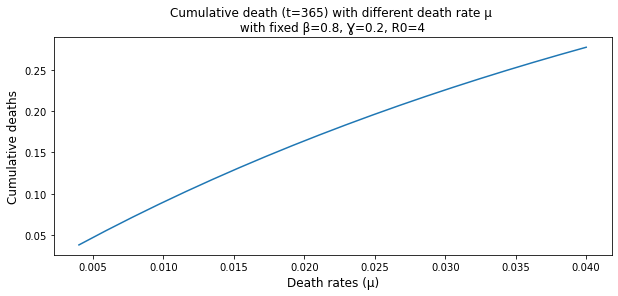


 TAKEAWAY: From the graph above, we can clearly see that given certain β and Ɣ, death number is highly determined by death rate μ with a positive corelation


In [137]:
######## Set Parameters
N = 1 # Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

β = 0.8 
Ɣ = 0.2 
mu_list = list(np.linspace(0.004, 0.04, 20)) # Create 20 μ in [0.4%, 4%]

t = np.linspace(0, 365, 365)# Set time range: 365 days;  Time scale/step: 1 day

######## SIRD model 
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I 
    dIdt = β * S * I - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

y0 = S0, I0, R0, D0# Initial conditions vector


######## Use for loop to integrate and calculate the Death(at t=365) with different mu
RIP = []
for m in mu_list:
    ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma,m))
    S, I, R, D = ret.T 
    RIP.append(D[-1])

######## Plot the data: 
fig = plt.figure(figsize=(10, 4))
plt.plot(mu_list,RIP)
plt.title("Cumulative death (t=365) with different death rate μ \n with fixed β=0.8, Ɣ=0.2, R0=4 ", fontsize=12, ha='center')
plt.xlabel("Death rates (μ)", fontsize=12, ha='center')
plt.ylabel("Cumulative deaths", fontsize=12, ha='center')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can clearly see that given certain β and Ɣ, death number is highly determined by death rate μ with a positive corelation")

### **2.2.Other Var Fixed, Changing R<sub>0</sub>**
We keep 𝜇 = 0.04

And R<sub>0</sub> has to hold: $3 <= \frac{\beta}{\gamma+0.04} <= 4$

- Beta is decided by gamma and R<sub>0</sub>

- We set Ɣ ∈(0, 1], since R<sub>0</sub> ∈\[3.0,4.0] and β = R<sub>0</sub> * (Ɣ + 0.04), therefore β ∈(0,4] ????????????????????????????????????

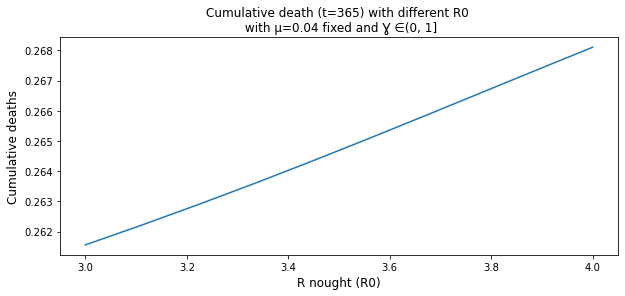


 TAKEAWAY: From the graph above, we can also see a positive effect of R0 on death counts, however, this effect is much less significant than that of μ. Therefore, we decide to further investigate the interaction between R0 and μ, and their combined effect of death counts


In [149]:
######## Set Parameters
N = 1 # Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

μ = 0.04 #Fix death rate
gamma_list = list(np.linspace(0.00001, 1, 10)) #Define γ range
R0_list = list(np.linspace(3, 4, 10)) #Define R0 range
beta_list = [] #Calculate beta and put them in here
para_dict = {'R0':[], 'Gamma':[], 'Beta':[], 'Death':[]} #Empty dictionary to be filled

######## Calculate and integration
for r in R0_list:
    for g in gamma_list:
        beta = r*(g + μ)
        
        ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma, μ)) #Integration of SIRD model
        S, I, R, D = ret.T 
        
        para_dict['R0'].append(r) # Fill para_dict with results
        para_dict['Gamma'].append(g)
        para_dict['Beta'].append(round(beta,3))
        para_dict['Death'].append(D[-1])

######## Data Transformation
df = pd.DataFrame(para_dict) #Create dataframe
df_R0 = df.groupby('R0').mean() #Calculate mean values across all columns per R0

######## Plot the Data
fig = plt.figure(figsize=(10, 4))
plt.plot(R0_list, df_R0['Death'])
plt.title("Cumulative death (t=365) with different R0 \n with μ=0.04 fixed and Ɣ ∈(0, 1]", fontsize=12, ha='center')
plt.xlabel("R nought (R0)", fontsize=12, ha='center')
plt.ylabel("Cumulative deaths", fontsize=12, ha='center')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can also see a positive effect of R0 on death counts, however, this effect is much less significant than that of μ. Therefore, we decide to further investigate the interaction between R0 and μ, and their combined effect of death counts")

### **2.3.Relationship between R<sub>0</sub> & 𝜇**

- Assume β is 1/10 of R<sub>0</sub>

- Create two arrays for μ ∈ \[0.4%,4%] and R<sub>0</sub> ∈\[3.0,4.0]

- Use these two parameter arrays as columns and indexes of a dataframe, which contains the cummulative death at t=365

- Plot the dataframe and investigate the interaction between μ and R<sub>0</sub>

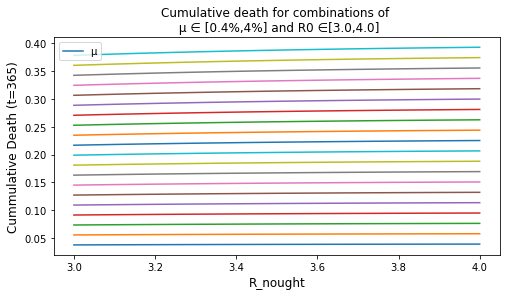


 TAKEAWAY: From the graph above, we can see: with regard to the prediction of death number at year end, also known as the cumulative number of deaths, R_nought has little impact as shown in the following graph. However, the death number is highly determined by the death rate μ


In [153]:
######## Set Parameters
N = 1 # Population size
I0, R0, D0 = 0.05, 0 , 0 #Initial conditions at t=0
S0 = N - I0 - R0 - D0 #Normalization

# Initial conditions vector at t=0
y0 = S0, I0, R0, D0

# A grid of time points (range: 365 days; scale/step: 1 day)
t = np.linspace(0, 365, 365) 

# Use R_nought ∈ [3.0,4.0] and μ ∈ [0.4%,4%] construct dataframe and get total death for each combination of R_nought and μ with a step size of 20
df = pd.DataFrame(index=np.linspace(3, 4, 20), #R_nought
                  columns=np.linspace(0.004, 0.04, 20)) #mu

######## Modeling and integration:
for r in df.index:
    β = r/10 #Calculate β from R_nought, Assuming 
    
    for μ in df.columns:
        Ɣ = β/r - μ #Calculate μ from β & R_nought
        
        # SIRD model
        def deriv_sird(y, t, N, β, Ɣ, μ):
            S, I, R, D = y
            dSdt = -β * S * I /(N - μ * I)
            dIdt = β * S * I /(N - μ * I) - Ɣ * I - μ * I
            dRdt = Ɣ * I
            dDdt = μ * I
            return dSdt, dIdt, dRdt, dDdt
        
        # Integrate the SIRD equations over the time grid t
        ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
        S, I, R, D = ret.T 
        df.loc[r,[μ]]= D[-1]


######## Plot the data:
fig = plt.figure(figsize=(8, 4))
plt.plot(df.index, df)
plt.title("Cumulative death for combinations of \n μ ∈ [0.4%,4%] and R0 ∈[3.0,4.0]", fontsize=12, ha='center')
plt.xlabel("R_nought", fontsize=12, ha='center')
plt.ylabel("Cummulative Death (t=365)", fontsize=12, ha='center')
plt.legend('μ', ncol=2, loc='upper left')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can see: with regard to the prediction of cumulative death at year end, R_nought has little impact as shown in the following graph. However, the death number is highly determined by the death rate μ")

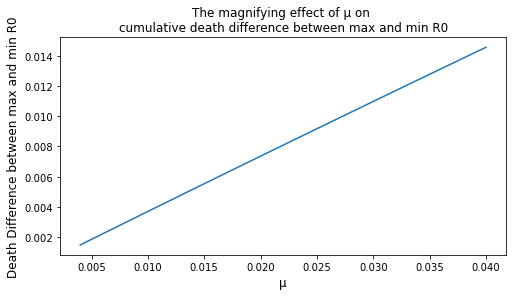


 TAKEAWAY: From the graph above, we can see: There is one interesting finding about the interaction of μ and R_nought: as μ increases, the effect of R_noght, silmulated by max death number associated with highest R_nought=4 minus min death number associated with low, is increasing as well. Therefore, μ magnifies the impact of R_nought. The higher the μ value, the larger impact R_nought can make to the cumulative death


In [156]:
stat = df.astype(float).describe()
spread = stat.loc['max'] - stat.loc['min']

######## Plot the data:
fig = plt.figure(figsize=(8, 4))
plt.plot(stat.columns, spread)
plt.title("The magnifying effect of μ on \ncumulative death difference between max and min R0", fontsize=12, ha='center')
plt.xlabel("μ", fontsize=12, ha='center')
plt.ylabel("Death Difference between max and min R0", fontsize=12, ha='center')
plt.show()

######## Print takeaway:
print("\033[1m" + '\n TAKEAWAY: ' + "\033[0m" + "From the graph above, we can see: There is one interesting finding about the interaction of μ and R_nought: as μ increases, the effect of R_noght, silmulated by max death number associated with highest R_nought=4 minus min death number associated with low, is increasing as well. Therefore, μ magnifies the impact of R_nought. The higher the μ value, the larger impact R_nought can make to the cumulative death")

### **2.4.Ploting the R<sub>e</sub>**


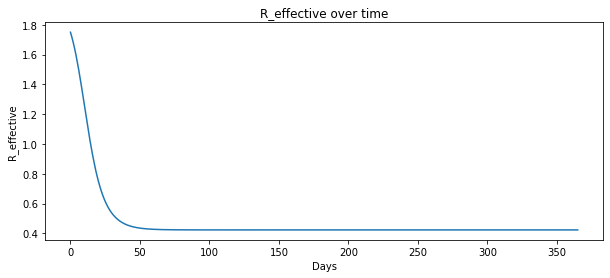

In [127]:
## Fixed Var
beta = 0.35
gamma = 0.15
mu = 0.04
R_nought = beta/(mu+gamma)

# time
t = np.linspace(0, 365, 365)

# ODE and Int
def deriv_sird(y, t, N, beta, gamma,mu):
    S, I, R ,D = y
    dSdt = -beta * S * I / N
    dIdt = beta * S * I / N - gamma * I - mu*I
    dRdt = gamma * I
    dDdt = mu*I
    
    return dSdt, dIdt, dRdt,dDdt

# Initial conditions vector
y0 = S0, I0, R0, D0

# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv_sird, y0, t, args=(N, beta, gamma,mu))
S, I, R, D = ret.T 

# R_effective over time
R_eff_list = []
for s in S:
    R_eff = R_nought * s/N
    R_eff_list.append(R_eff)


fig = plt.figure(figsize=(10, 4))
#ax = fig.add_axes([0,0,1,1])
plt.plot(t,R_eff_list)
plt.title("R_effective over time")
plt.xlabel("Days")
plt.ylabel("R_effective")
# for spine in ("top", "right"):
#     ax.spines[spine].set_visible(False)
plt.show()

# 2.Question-1 (c)

(c) Study numerically the effects of a hard versus soft lockdown (measured by two of  your  reasonable  choices of β),  in  terms  of D(365d).   What  about  the cumulative  number  of  deaths  after  a  year?   Assume μ = 1%  and  a γ compatible with R0= 4.

Population size: 1
Infected at t=0: 0.07
R0= 4
R_eff=1 at t= 10 d
Cummulative Death Number (t=365) 0.07855085122089117


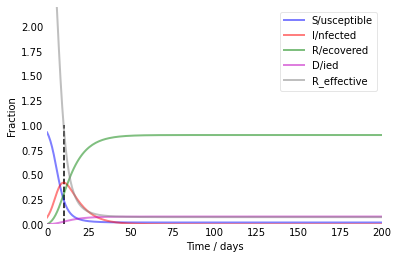

Population size: 1
Infected at t=0: 0.07
R0= 4
R_eff=1 at t= 50 d
Cummulative Death Number (t=365) 0.39254063529895844


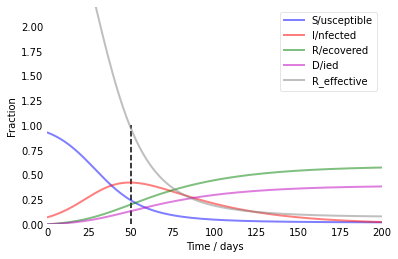

In [128]:
N = 1 # Population size
I0, R0, D0 = 0.07, 0, 0 #Initial conditions t=0
S0 = N - I0 - R0 - D0 #Normalization

#R_nought = β / (Ɣ + μ)
R_nought = 4
β_list = [0.5, 0.1] ############## Two Betas
μ = 0.01 

# Set time range: 365 days;  Time scale/step: 1 day
t = np.linspace(0, 365, 365)# A grid of time points (in days)

# Initial conditions vector
y0 = S0, I0, R0, D0

######## SIRD model 
def deriv_sird(y, t, N, β, Ɣ, μ):
    S, I, R, D = y
    dSdt = -β * S * I /(N - μ * I)
    dIdt = β * S * I /(N - μ * I) - Ɣ * I - μ * I
    dRdt = Ɣ * I
    dDdt = μ * I
    return dSdt, dIdt, dRdt, dDdt

######## Calculate and plot using two Betas
for β in β_list:
    Ɣ = β / R_nought - μ

    # Integrate the SIRD equations over the time grid t. args takes all parameters
    ret = odeint(deriv_sird, y0, t, args=(N, β, Ɣ, μ))
    S, I, R, D = ret.T # return 4 vectors

    #find the time when R_effective = 1, R_effective = R_nought * S/N, as used in the plot
    t_1 = 0
    for time in range(0,len(S)):
        if R_nought*S[time]/N < 1:  
            t_1 = time
            break

    #Print Info.:
    print("Population size:", N)
    print("Infected at t=0:", I0)
    print ("R0=",R_nought)
    print("R_eff=1 at t=", t_1, "d")
    print("Cummulative Death Number (t=365)", D[-1])

    # Plot the data on three separate curves for S(t), I(t) and R(t)
    fig = plt.figure(facecolor='w')
    ax = fig.add_subplot(111, axisbelow=True)
    ax.plot(t, S/N, 'b', alpha=0.5, lw=2, label='S/usceptible')
    ax.plot(t, I/N, 'r', alpha=0.5, lw=2, label='I/nfected')
    ax.plot(t, R/N, 'g', alpha=0.5, lw=2, label='R/ecovered')
    ax.plot(t, D/N, 'm', alpha=0.5, lw=2, label='D/ied')
    ax.plot(t, R_nought*S/N, 'gray', alpha=0.5, lw=2, label='R_effective')
    ax.set_xlabel('Time / days')
    ax.set_ylabel('Fraction')
    ax.set_ylim(0,2.2)
    ax.set_xlim(0,200)
    ax.vlines(t_1, 0, 1, colors='k', linestyles='dashed')
    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    #ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    plt.show()







